Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                      

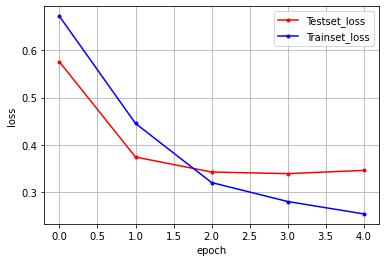

In [4]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)
"""
학습셋과 테스트셋을 지정할때, 빈도가 비정상적이게 높은 단어를 제외하기우해
num_words = 5000을 할당하여 빈도가 1~5000사이의 단어만을 데이터로 사용한다고 선언하는 부분이다.
"""
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)

#데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history  = model.fit(x_train, y_train, batch_size=1000, epochs=5,validation_data=(x_test,y_test))

print("\n Test Accuracy: {model.evaluate(x_test, y_test)[1]:.4f}")

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()